In [1]:
% ls

aclImdb/                                   poincare.ipynb
AttentionAllNeed.ipynb                     PyTorch.ipynb
attention-is-all-you-need-pytorch-master/  question-words.txt
cifar/                                     question-words.txt~
CS231n/                                    random.ipynb
Data_law/                                  senteval.ipynb
DenseNet.ipynb                             sonnet_tf_dnc.ipynb
doc2vec_imdb.ipynb                         super_resolution_with_caffe2.ipynb
doc2vec.ipynb                              tempdata/
DrQA/                                      tmp/
faces/                                     train.txt
FAST.ai_TF/                                train-v1.1.json
Fconv seq2seq.ipynb                        USC/
gensim_Trained models/                     u_s_code_scrapper.ipynb
htm_uscAll@115-95not91/                    USCpickle/
InferSent-master/                          word2vec.ipynb
infersent-pani.ipynb                       work/
new_legal_data/


In [2]:
% cd InferSent-master/encoder/

/home/piyank/Documents/Python_Scripts/InferSent-master/encoder


In [3]:
% ls

demo.ipynb          infersent.allnli.pickle  __pycache__/  samples.txt
evaluate_model.py*  models.py                README.md     xutils.py


In [4]:
# import stuff
%load_ext autoreload
%autoreload 2
%matplotlib inline

from random import randint
import matplotlib

import numpy as np
import torch

GLOVE_PATH = '../dataset/GloVe/glove.840B.300d.txt'

In [6]:
model = torch.load('infersent.allnli.pickle')

/home/piyank/anaconda3/lib/python3.6/site-packages/torch/serialization.py:316: SourceChangeWarning: source code of class 'torch.nn.modules.rnn.LSTM' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [11]:
model.train(False)

BLSTMEncoder(
  (enc_lstm): LSTM(300, 2048, bidirectional=True)
)

In [7]:
model.cuda()

BLSTMEncoder(
  (enc_lstm): LSTM(300, 2048, bidirectional=True)
)

In [20]:
new_enc_lstm = nn.LSTM(300,100, 1,bidirectional=True )

In [23]:
a,b = new_enc_lstm(batch)

In [27]:
a.size() , b[0].size() , b[1].size()

(torch.Size([9, 1, 200]), torch.Size([2, 1, 100]), torch.Size([2, 1, 100]))

In [31]:
out , ( hid1, hid2 ) = model.enc_lstm(batch)

/home/piyank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greately increasing memory usage. To compact weights again call flatten_parameters().
  """Entry point for launching an IPython kernel.


In [34]:
output, idxs = torch.max( out,0)

In [35]:
idxs = idxs.data.cpu().numpy()

In [36]:
argmaxs = [np.sum((idxs == k)) for k in range(len(sent[0]))]

In [37]:
argmaxs

[359, 471, 366, 648, 826, 335, 279, 483, 329]

In [38]:
sent

[['<s>', 'is', 'the', 'former', 'president', 'of', 'the', '.', '</s>']]

In [39]:
x = range(len(sent[0]))
y = [100.0*n/np.sum(argmaxs) for n in argmaxs]

In [40]:
x

range(0, 9)

In [41]:
y

[8.7646484375,
 11.4990234375,
 8.935546875,
 15.8203125,
 20.166015625,
 8.1787109375,
 6.8115234375,
 11.7919921875,
 8.0322265625]

In [43]:
import matplotlib.pyplot as plt

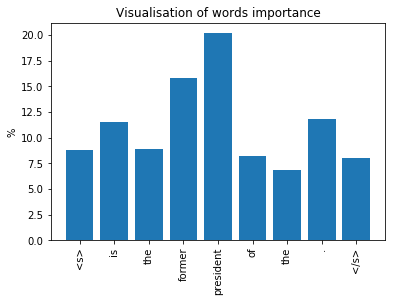

In [50]:
plt.xticks(x, sent[0], rotation=90)
plt.bar(x, y)
plt.ylabel('%')
plt.title('Visualisation of words importance')
plt.show()

In [12]:
model.set_glove_path(GLOVE_PATH)

In [13]:
model.build_vocab_k_words(K=100000)

Vocab size : 100000


In [14]:
sentences = []
with open('samples.txt') as f:
    for line in f:
        sentences.append(line.strip())
print(len(sentences))

9815


In [ ]:
model.build_vocab

In [50]:
a = model.encode( [sentences[0],sentences[1]] )

In [63]:
feature = numpy.concatenate( (a[0],a[1]) )

In [65]:
feature.shape

(8192,)

In [49]:
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import torch

In [67]:
n1 = nn.Linear(8192,1024)
d1 = nn.Dropout(p=.5)
n2 = nn.Linear(1024,64)
d2 = nn.Dropout(p=.9)
n3 = nn.Linear(64,1)

In [69]:
final_layer = nn.Sequential( n1 , d1 , n2 , d2 , n3)

In [73]:
var = Variable( torch.Tensor( numpy.concatenate( (a[0],a[1]) ) ).unsqueeze(dim=0) )

In [74]:
var

Variable containing:
 0.1045  0.0951  0.0000  ...   0.0004 -0.0155 -0.0168
[torch.FloatTensor of size 1x8192]

In [75]:
final_layer(var)

Variable containing:
1.00000e-02 *
  7.1780
[torch.FloatTensor of size 1x1]

In [81]:
rn = torch.rand(2,4)

In [82]:
rn


 0.0719  0.2469  0.0000  0.7791
 0.7248  0.0612  0.7707  0.1667
[torch.FloatTensor of size 2x4]

In [86]:
loss = torch.nn.CrossEntropyLoss()

In [ ]:
loss()

In [89]:
loss = nn.CrossEntropyLoss()
input = Variable(torch.randn(3, 5), requires_grad=True)
print( input )
target = Variable(torch.LongTensor(3).random_(5))
print( target )
output = loss(input, target)
print( output)

Variable containing:
-1.9911 -0.9051  1.3323  0.1506  1.1719
-0.3732  0.9931  0.1970 -0.1543  0.2190
-1.1949  0.8797 -0.6973  1.1676  0.4829
[torch.FloatTensor of size 3x5]

Variable containing:
 4
 2
 1
[torch.LongTensor of size 3]

Variable containing:
 1.3019
[torch.FloatTensor of size 1]



In [15]:
sentences

['Everyone really likes the newest benefits',
 'The Government Executive articles housed on the website are not able to be searched .',
 'I like him for the most part , but would still enjoy seeing someone beat him .',
 'My favorite restaurants are always at least a hundred miles away from my house .',
 'I know exactly .',
 'We have plenty of space in the landfill .',
 'I did that all through college but it never worked',
 "Most of Mrinal Sen 's work can be found in European collections .",
 'THe strike price could be $ 8 .',
 'Would you rise up and defeaat all evil lords in the town ?',
 'Go downwards to one of the gates , all of which will lead you into the cathedral .',
 "The Tamils ' bhakti movement froze the previously warm ritual of Hinduism .",
 'Everyone involved was the same age .',
 'Severn said the people were not welcome there .',
 "We do n't loan a lot of money .",
 "I do n't know how cold it got last night .",
 'I need a way to add something extra .',
 'Sometimes it is am

In [16]:
torch.set_num_threads(3)

In [17]:
embeddings = model.encode(sentences, bsize=128, tokenize=False, verbose=True)
print('nb sentences encoded : {0}'.format(len(embeddings)))

Nb words kept : 128201/130068 (98.56 %)
Speed : 303.68 sentences/s (gpu mode, bsize=128)
nb sentences encoded : 9815


In [20]:
embeddings.shape

(9815, 4096)

In [21]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [14]:
cosine(model.encode(['Lions prey consists mainly of mammals, particularly ungulates, with a preference for wildebeest, zebras, buffalo, gemsbok, and giraffes in Africa and chital, sambar deer, nilgai, wild boar, chinkara and chousingha in India.'])[0], model.encode(['the cat drinks.'])[0])

/home/piyank/Documents/Python_Scripts/InferSent-master/encoder/models.py:53: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greately increasing memory usage. To compact weights again call flatten_parameters().
  sent_output = self.enc_lstm(sent_packed)[0]  # seqlen x batch x 2*nhid


0.81652409

In [36]:
z = model.encode(['Lizbons prey consists mainly of mammals, particularly ungulates, with a preference for wildebeest, zebras, buffalo, gemsbok, and giraffes in Africa and chital, sambar deer, nilgai, wild boar, chinkara and chousingha in India.'])[0]
zz = model.encode( ['In the wild, tigers mostly feed on large and medium-sized animals, preferring ungulates weighing at least 90 kg (200 lb)'] )[0]

In [37]:
z , zz

(array([ 0.15029465,  0.13682319,  0.0520266 , ...,  0.06754854,
        -0.03814263,  0.07030573], dtype=float32),
 array([ 0.11572538,  0.1495298 ,  0.00819026, ...,  0.07049085,
        -0.03814263,  0.10234506], dtype=float32))

In [38]:
cosine(z,zz)

0.783903

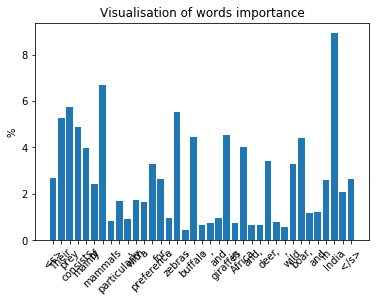

(Variable containing:
  0.1501  0.1331  0.0519  ...   0.0675 -0.0381  0.0703
 [torch.cuda.FloatTensor of size 1x4096 (GPU 0)],
 array([[23,  5, 23, ...,  3, 36, 26]]))

In [31]:
model.visualize('Their prey consists mainly of mammals, particularly ungulates, with a preference for wildebeest, zebras, buffalo, gemsbok, and giraffes in Africa and chital, sambar deer, nilgai, wild boar, chinkara and chousingha in India.')

In [29]:
z.shape

(223, 4096)

3136


/home/piyank/Documents/Python_Scripts/InferSent-master/encoder/models.py:237: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greately increasing memory usage. To compact weights again call flatten_parameters().
  output = self.enc_lstm(batch)[0]


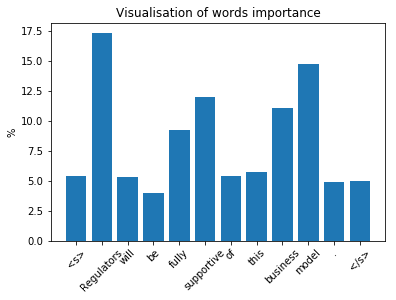

In [15]:
idx = randint(0, len(sentences))
print( idx )
_, _ = model.visualize(sentences[idx])

/home/piyank/Documents/Python_Scripts/InferSent-master/encoder/models.py:237: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greately increasing memory usage. To compact weights again call flatten_parameters().
  output = self.enc_lstm(batch)[0]


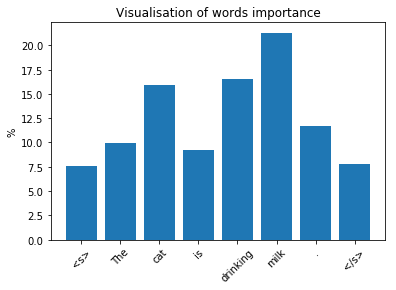

In [16]:
my_sent = 'The cat is drinking milk.'
_, _ = model.visualize(my_sent)

Vocab size : 500000


/home/piyank/Documents/Python_Scripts/InferSent-master/encoder/models.py:237: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greately increasing memory usage. To compact weights again call flatten_parameters().
  output = self.enc_lstm(batch)[0]


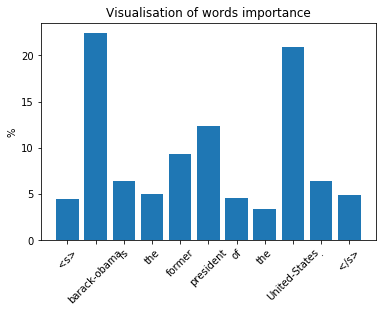

In [17]:
model.build_vocab_k_words(500000) # getting 500K words vocab
my_sent = 'barack-obama is the former president of the United-States.'
_, _ = model.visualize(my_sent)

/home/piyank/Documents/Python_Scripts/InferSent-master/encoder/models.py:237: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greately increasing memory usage. To compact weights again call flatten_parameters().
  output = self.enc_lstm(batch)[0]


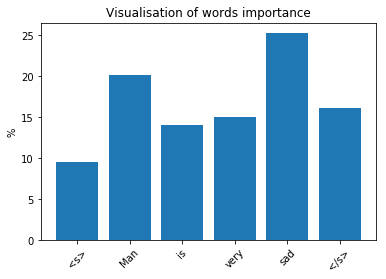

In [20]:
my_sent =  "Man is very sad"
_, _ = model.visualize(my_sent)

In [19]:
cosine(model.encode(['birds chirp and can fly'])[0], model.encode(['the man sentenced to 5 years in jail for murder'])[0])

/home/piyank/Documents/Python_Scripts/InferSent-master/encoder/models.py:53: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greately increasing memory usage. To compact weights again call flatten_parameters().
  sent_output = self.enc_lstm(sent_packed)[0]  # seqlen x batch x 2*nhid


0.19822945

In [8]:
def get_glove_k( K):
    k = 0
    word_vec = {}
    with open( GLOVE_PATH ) as f:
        for line in f:
            word, vec = line.split(' ', 1)
            if k <= K:
                word_vec[word] = np.fromstring(vec, sep=' ')
                k += 1
            if k > K:
                if word in ['<s>', '</s>']:
                    word_vec[word] = np.fromstring(vec, sep=' ')

            if k > K and all([w in word_vec for w in ['<s>', '</s>']]):
                break
    return word_vec

In [9]:
word_vec = get_glove_k(100000)

In [10]:
my_sent = 'barack-obama is the former president of the United-States.'

In [11]:
def get_batch(batch):
    embed = np.zeros((len(batch[0]), len(batch), 300))

    for i in range(len(batch)):
        for j in range(len(batch[i])):
            embed[j, i, :] = word_vec[batch[i][j]]

    return torch.FloatTensor(embed)

In [12]:
from nltk.tokenize import word_tokenize

In [13]:
sent = word_tokenize(my_sent)

In [14]:
sent = [['<s>'] + [word for word in sent if word in word_vec] + ['</s>']]

In [15]:
sent

[['<s>', 'is', 'the', 'former', 'president', 'of', 'the', '.', '</s>']]

In [16]:
batch = Variable(get_batch(sent), volatile=True)

In [29]:
batch.size()
batch = batch.cuda()

In [7]:
import numpy as np
import time

import torch
from torch.autograd import Variable
import torch.nn as nn

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
class BLSTMEncoder(nn.Module):
    
    def __init__(self, config):
        super(BLSTMEncoder, self).__init__()
        self.bsize = config['bsize']
        self.word_emb_dim = config['word_emb_dim']
        self.enc_lstm_dim = config['enc_lstm_dim']
        self.pool_type = config['pool_type']
        self.dpout_model = config['dpout_model']
        
        self.enc_lstm = nn.LSTM(self.word_emb_dim, self.enc_lstm_dim, 1, 
                                bidirectional=True, dropout=self.dpout_model)

In [106]:
def get_word_dict(sentences, tokenize=True):
    # create vocab of words
    word_dict = {}
    if tokenize:
        from nltk.tokenize import word_tokenize
    sentences = [s.split() if not tokenize else word_tokenize(s)
                 for s in sentences]
    for sent in sentences:
        for word in sent:
            if word not in word_dict:
                word_dict[word] = ''
    word_dict['<s>'] = ''
    word_dict['</s>'] = ''
    return word_dict

In [158]:
word_dict = get_word_dict(["Against that backdrop, the City filed this lawsuit under the Racketeer Influenced and Corrupt Organizations Act (RICO), alleging that Hemi failed to file the required customer information with the State. That failure, the City argues, constitutes mail and wire fraud, which caused it to lose tens of millions of dollars in unrecovered cigarette taxes. Because the City cannot show that it lost the tax revenue \"by reason of\" the alleged RICO violation, 18 U.S.C. § 1964(c), we hold that the City cannot state a claim under RICO. We therefore reverse the Court of Appeals' decision to the contrary."])

In [159]:
glove_path = "InferSent-master/dataset/GloVe/glove.840B.300d.txt"

In [160]:
def get_glove( word_dict):
#     assert hasattr(self, 'glove_path'), 'warning : you need to set_glove_path(glove_path)'
    # create word_vec with glove vectors
    word_vec = {}
    with open(glove_path) as f:
        for line in f:
            word, vec = line.split(' ', 1)
            if word in word_dict:
                word_vec[word] = np.fromstring(vec, sep=' ')
    print('Found {0}(/{1}) words with glove vectors'.format(len(word_vec), len(word_dict)))
    return word_vec

In [161]:
get_glove( word_dict)

Found 82(/82) words with glove vectors


{"'": array([-0.26262  ,  0.54245  ,  0.071425 , -0.14694  ,  0.83382  ,
        -0.02344  ,  0.54123  , -0.087734 , -0.38268  ,  1.3026   ,
        -0.47069  , -0.074245 ,  0.61304  , -0.072747 , -0.028768 ,
         0.33174  , -0.19657  ,  0.64092  , -0.049666 , -0.23659  ,
        -0.33996  ,  0.43561  , -0.11213  ,  0.30993  ,  0.61957  ,
        -0.53714  ,  0.1502   ,  0.22639  ,  0.57131  , -0.12838  ,
        -0.62673  ,  0.096311 ,  0.018252 ,  0.12114  ,  0.22448  ,
         0.017776 ,  0.072011 ,  0.12586  , -0.29035  , -0.1001   ,
        -0.12138  , -0.3981   , -0.1765   , -0.16082  ,  0.10594  ,
        -0.48573  ,  0.26375  ,  0.22152  , -0.083072 ,  0.45242  ,
         0.12515  , -0.16047  , -0.062651 ,  0.10458  , -0.19068  ,
         0.019578 ,  0.21626  , -0.18915  , -0.13013  , -0.069552 ,
         0.028227 ,  0.1026   ,  0.88001  , -0.082454 ,  0.69309  ,
         0.041195 ,  0.075086 , -0.36453  ,  0.019272 ,  0.28889  ,
         0.31616  ,  0.094477 , -0.070966 ,

In [167]:
import tqdm

In [177]:
z = {'a':0,'b':10}

In [178]:
z.update({'c':21,'d':123})

In [179]:
z

{'a': 0, 'b': 10, 'c': 21, 'd': 123}

In [171]:
with open(glove_path) as f:
    for ind,line in tqdm.tqdm(enumerate(f)):
        a,_=line.split(' ',1)
        if '<' in a:
            print(a,ind)

TypeError: object of type '_io.TextIOWrapper' has no len()

In [175]:
all( [True,True,False,True] )

False

In [165]:
line = "sad 1.2 2.23 2.4"
np.fromstring( line.split(' ',1)[1] , sep=' ' )

array([ 1.2 ,  2.23,  2.4 ])